Ćwiczenia z Równań różniczkowych, Matematyka i analiza danych, MiNI PW, 2025/26

# 6. Schematy różnicowe i liniowe metody wielokrokowe

Liniowa metoda wielokrokowa:
$$\alpha_k x_{n+k} + \alpha_{k-1} x_{n+k-1} + \ldots + \alpha_0 x_n = h\cdot
\left(\beta_k f_{n+k} + \beta_{k-1} f_{n+k-1} + \ldots + \beta_0 f_n\right). \quad (\star)$$

**Def. 1.** *Liniowym operatorem różnicowym* $\mathscr{L}_h$ związanym z liniową metodą $k$-krokową $(\star)$ nazywamy operator przypisujący dowolnej funkcji $z$ klasy $\mathcal{C}^1$ funkcję 
$$\mathscr{L}_hz(t) = \sum_{j=0}^k \big(\alpha_j z(t+jh) - h\beta_j z'(t+jh)\big).$$

**Def. 2.** Liniowy operator różnicowy $\mathscr{L}_h$ jest *zgodny rzędu $p$*, jeśli 
$$\mathscr{L}_h z(t) = \mathcal{O}(h^{p+1})$$
dla $p\in\mathbb{Z}_+$ i dowolnej funkcji odpowiednio gładkiej $z$. Metodę nazywamy *zgodną*, jeśli jest zgodna rzędu 1.

**Def. 3.** Liniowa metoda $k$-krokowa jest *zbieżna rzędu $p$*, jeśli dla dowolnych warunków początkowych i dla dowolnej funkcji $\mathbf{f}$ odpowiednio gładkiej istnieją stałe $C,h_0>0$ takie, że 
$$\Vert\mathbf{x}(t) - \mathbf{x}_h(t)\Vert \leq C h^p \qquad\text{dla }h\leq h_0,$$
o ile wartości startowe metody spełniały 
$$\Vert\mathbf{x}(t_n) - \mathbf{x}_h(t_n)\Vert \leq C h^p \qquad\text{dla }h\leq h_0\text{ i }n=0,1,\ldots,k-1.$$

**Tw. 4.** Zbieżna liniowa metoda wielokrokowa $(\star)$ jest zgodna.

**Def. 5.** *Pierwszym* oraz *drugim wielomianem charakterystycznym* liniowej metody $k$-krokowej $(\star)$ nazywamy odpowiednio 
$$\rho(r) = \alpha_k r^k + \alpha_{k-1} r^{k-1} + \ldots + \alpha_0, \qquad\qquad
        \sigma(r) = \beta_k r^k + \beta_{k-1} r^{k-1} + \ldots + \beta_0.$$

**Tw. 6.** Metoda $(\star)$ jest zgodna wtedy i tylko wtedy, gdy $\rho(1) = 0$ oraz $\rho'(1) = \sigma(1)$.

**Def. 7.** Liniowa metoda wielokrokowa $(\star)$ jest *0-stabilna* (*D-stabilna* lub *stabilna w sensie Dahlquista*), jeśli wszystkie pierwiastki pierwszego wielomianu charakterystycznego leżą wewnątrz lub na brzegu koła jednostkowego, a pierwiastki leżące na brzegu są pojedyncze.

**Tw. 8** (Dahlquista, 1956)**.** Jeśli liniowa metoda wielokrokowa $(\star)$ jest 0-stabilna i zgodna rzędu $p$, to jest zbieżna rzędu $p$.

Liniowe metody wielokrokowe omawiane podczas tych zajęć:
* metoda Eulera: 
$$x_{n+1} = x_n + h\cdot f_n$$
(metoda 1-krokowa, zgodna rzędu 1, stabilna);
* 2-krokowa metoda Adamsa-Bashfortha:
$$x_{n+2} = x_{n+1} + \frac{1}{2}h(3f_{n+1} - f_n)$$
(metoda 2-krokowa, zgodna rzędu 2, stabilna);
* metoda punktu środkowego:
$$x_{n+2} = x_n + 2hf_{n+1}$$
(metoda 2-krokowa, zgodna rzędu 2, stabilna).

**UWAGA.** W poniższych zadaniach należy uzupełnić definicje funkcji (o podanych argumentach) i sprawdzić ich działanie.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

**1.** Zaimplementuj metodę Eulera. Zastosuj ją do znalezienia przybliżonego rozwiązania problemu
$$x'(t) = (1-2t)x(t), \; x(0)=1,$$
który ma znane rozwiązanie $x(t) = \exp\big(\frac{1}{4}-(\frac{1}{2}-t)^2\big)$. Eksperyment przeprowadź na przedziale $t\in(0,3)$ i dla parametru kroku siatki $h$ równego $0{,}3$, $0{,}15$ oraz $0{,}075$. Zilustruj rząd dokładności metody.

In [3]:
def euler_step(fun, t0, x0, h):
    """
    Pojedynczy krok w metodzie Eulera.
    
    Parametry
    ----------
    fun : obiekt wywoływalny (callable)
        Prawa strona układu równań.
    t0 : float
        Krok czasowy t_n.
    x0 : ndarray, wymiaru (d,)
        Wartość przybliżenia x_n.
    h : float
        Krok czasowy.
    
    Zwraca
    -------
    x_new : ndarray, wymiaru (d,)
        Rozwiązanie przybliżone w punkcie t_(n+1).
    """
    x_new = x0 + h * fun(t0, x0)
    return x_new

In [4]:
def fun(t, x):
    "Prawa strona równania x' = (1 - 2 * t) * x."
    dx = (1 - 2 * t) * x
    return dx

tspan = [0, 3]
x0 = 1
sol_true = lambda t: np.exp(0.25 - (0.5 - t)**2)

In [11]:
h = 0.001

time = np.arange(tspan[0], tspan[1], h)
x = np.zeros(time.size)

x[0] = x0
for i in range(len(time)-1):
    x[i+1] = euler_step(fun, time[i], x[i], h)

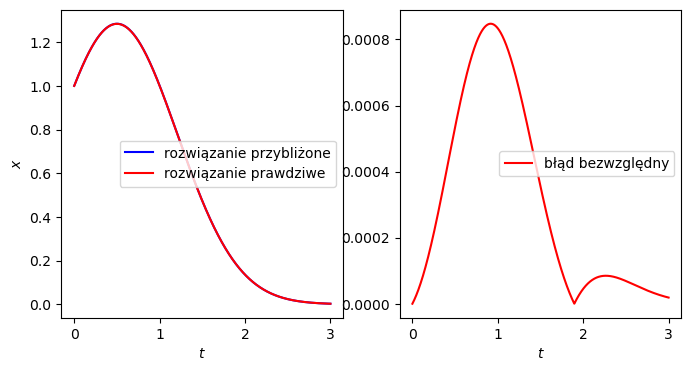

In [12]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(time, x, 'b', label="rozwiązanie przybliżone")
axes[0].plot(time, sol_true(time), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].legend()

axes[1].plot(time, np.abs(x-sol_true(time)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

In [17]:
h1 = 0.03

time1 = np.arange(tspan[0], tspan[1], h1)
x1 = np.zeros(time1.size)

x1[0] = x0
for i in range(len(time1)-1):
    x1[i+1] = euler_step(fun, time1[i], x1[i], h1)

In [18]:
h2 = 0.015

time2 = np.arange(tspan[0], tspan[1], h2)
x2 = np.zeros(time2.size)

x2[0] = x0
for i in range(len(time2)-1):
    x2[i+1] = euler_step(fun, time2[i], x2[i], h2)

In [19]:
h3 = 0.0075

time3 = np.arange(tspan[0], tspan[1], h3)
x3 = np.zeros(time3.size)

x3[0] = x0
for i in range(len(time3)-1):
    x3[i+1] = euler_step(fun, time3[i], x3[i], h3)

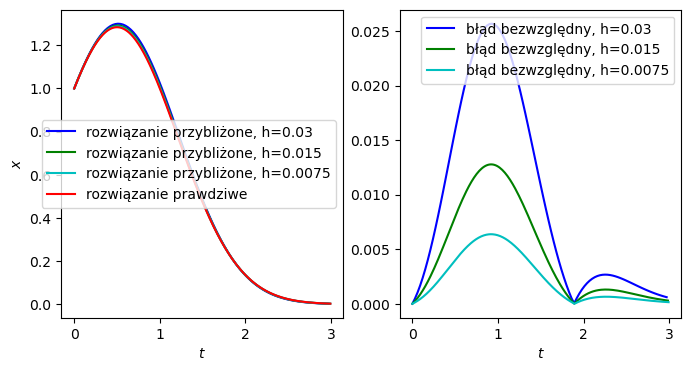

In [20]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(time1, x1, 'b', label="rozwiązanie przybliżone, h=0.03")
axes[0].plot(time2, x2, 'g', label="rozwiązanie przybliżone, h=0.015")
axes[0].plot(time3, x3, 'c', label="rozwiązanie przybliżone, h=0.0075")
axes[0].plot(time3, sol_true(time3), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].legend()

axes[1].plot(time1, np.abs(x1-sol_true(time1)), 'b', label="błąd bezwzględny, h=0.03")
axes[1].plot(time2, np.abs(x2-sol_true(time2)), 'g', label="błąd bezwzględny, h=0.015")
axes[1].plot(time3, np.abs(x3-sol_true(time3)), 'c', label="błąd bezwzględny, h=0.0075")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

Każdą z samodzielnie zaimplementowanych metod można również użyć razem z funkcją `solve_ivp`, omawianą na poprzednich zajęciach. Domyślnie funkcja `solve_ivp` używa metody rzędu 4 (co oznacza, że błąd zmniejsza się proporcjonalnie do czwartej potęgi długości kroku). Można jednak wykorzystać też własne metody implementując odpowiednie klasy dziedziczące po `OdeSolver`.

Zrobimy pewne uproszczenia:
* pominiemy możliwość zadawania własnej siatki (tzn. parametru `t_eval`) lub znajdowania rozwiązania interpolowanego (czyli opcji `dense_output=True`) - za to będziemy zawsze podawać krok startowy, z jakim metoda będzie wykonywać obliczenia,
* nie będziemy zajmować się metodami niejawnymi.

In [21]:
class Euler(integrate.OdeSolver):
    """
    Stałokrokowa otwarta metoda Eulera (rzędu 1).
    
    (parametry i atrybuty jak w metodach zaimplementowanych w pakiecie `SciPy`.)
    """
    def __init__(self, fun, t0, y0, t_bound, max_step=np.inf, 
                 rtol=1e-3, atol=1e-6, vectorized=False,
                 first_step=None, **extraneous):
        integrate._ivp.common.warn_extraneous(extraneous)
        super(Euler, self).__init__(fun, t0, y0, t_bound, vectorized, 
                                    support_complex=True)
        self.y_old = None
        self.t0 = t0
        self.max_step = integrate._ivp.common.validate_max_step(max_step)
        self.error_estimator_order = 1  # WAŻNE! Należy podać rząd metody
        self.rtol, self.atol = integrate._ivp.common.validate_tol(rtol, atol, self.n)
        self.f = self.fun(self.t, self.y)
        if first_step is None:
            self.h_abs = integrate._ivp.common.select_initial_step(
                self.fun, self.t, self.y, self.f, self.direction,
                self.error_estimator_order, self.rtol, self.atol)
        else:
            self.h_abs = integrate._ivp.common.validate_first_step(first_step, t0, t_bound)

    def _step_impl(self):
        t = self.t
        y = self.y
        self.y_old = y
        self.t = t + self.h_abs * self.direction
        self.y = euler_step(self.fun, t, y, self.h_abs * self.direction)

        return True, None
    
    def _dense_output_impl(self):
        return None

Do przetestowania tej funkcji wykorzystamy tzw. model dwóch ciał - dwie masy ($M_1$ i $M_2$) oddziałują na siebie grawitacyjnie i poruszają się. Można pokazać, że środek masy takiego układu porusza się ruchem jednostajnym, można więc przyjąć go jako punkt odniesienia. Aby znaleźć trajektorie ruchu obu mas wystarczy rozwiązać układ dwóch równań: \begin{align*}
r_x''(t) &= - G\frac{r_x(t)}{(r_x^2(t) + r_y^2(t))^{3/2}}, &\quad &r_x(0) = r_{x0},\, r_x'(0) = v_{x0}, \\
r_y''(t) &= - G\frac{r_y(t)}{(r_x^2(t) + r_y^2(t))^{3/2}}, &\quad &r_y(0) = r_{y0},\, r_y'(0) = v_{y0},
\end{align*} a wówczas ruch mas $M_1$ i $M_2$ wokół środka masy jest dany, kolejno, wzorem:
$$R_1(t) = \frac{M_2}{M_1+M_2}(r_x(t), r_y(t)), \quad
R_2(t) = \frac{-M_1}{M_1+M_2}(r_x(t), r_y(t)).$$
Przyjmiemy dla uproszczenia, że $M_1+M_2=1$ oraz $G=1$.

In [22]:
def TwoBodies(t, R):
    """
    Prawa strona układu równań opisującego model dwóch ciał
    (przy założeniu, że M1+M2=1 oraz G=1)
    """
    R0, R1 = R[2], R[3]
    R2, R3 = - R[0] / np.sqrt(R[0]**2 + R[1]**2)**3, - R[1] / np.sqrt(R[0]**2 + R[1]**2)**3
    return [R0, R1, R2, R3]

Aby sprawdzić działanie zaimplementowanej metody, powinniśmy ją porównać z jakąś metodą referencyjną. Użyjemy do tego metody `'DOP853'` dostępnej w `solve_ivp`.

In [25]:
M1, M2 = 0.05, 0.95
R0 = 0.95 / M2, 0, 0, 0.6 / M2

tspan = [0, 20]
h = 0.0001
sol_euler = integrate.solve_ivp(TwoBodies, tspan, R0, method=Euler, first_step=h)
sol_true = integrate.solve_ivp(TwoBodies, tspan, R0, method='DOP853', dense_output=True, rtol=1e-6, atol=1e-9)

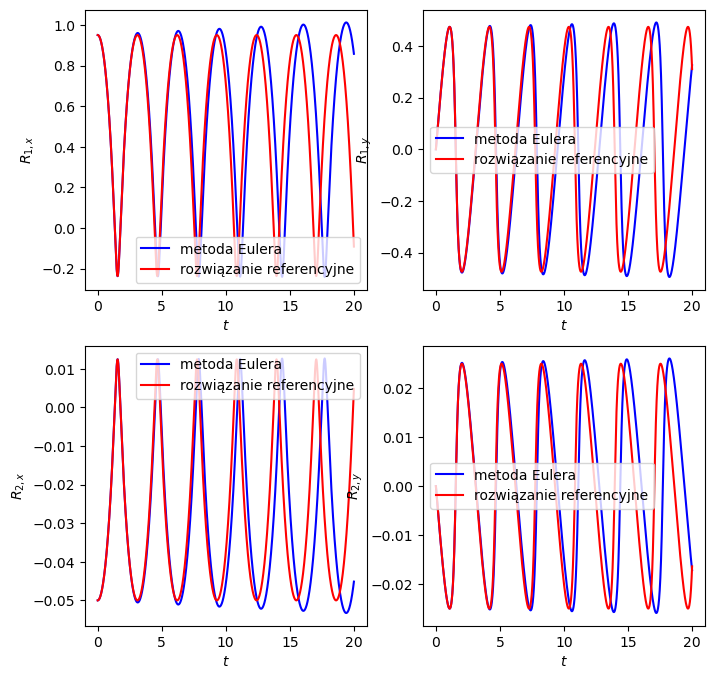

In [26]:
_, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0,0].plot(sol_euler.t, M2 * sol_euler.y[0], 'b', label="metoda Eulera")
axes[0,0].plot(sol_euler.t, M2 * sol_true.sol(sol_euler.t)[0], 'r', label="rozwiązanie referencyjne")
axes[0,0].set_xlabel("$t$")
axes[0,0].set_ylabel("$R_{1,x}$")
axes[0,0].legend()

axes[0,1].plot(sol_euler.t, M2 * sol_euler.y[1], 'b', label="metoda Eulera")
axes[0,1].plot(sol_euler.t, M2 * sol_true.sol(sol_euler.t)[1], 'r', label="rozwiązanie referencyjne")
axes[0,1].set_xlabel("$t$")
axes[0,1].set_ylabel("$R_{1,y}$")
axes[0,1].legend()

axes[1,0].plot(sol_euler.t, - M1 * sol_euler.y[0], 'b', label="metoda Eulera")
axes[1,0].plot(sol_euler.t, - M1 * sol_true.sol(sol_euler.t)[0], 'r', label="rozwiązanie referencyjne")
axes[1,0].set_xlabel("$t$")
axes[1,0].set_ylabel("$R_{2,x}$")
axes[1,0].legend()

axes[1,1].plot(sol_euler.t, - M1 * sol_euler.y[1], 'b', label="metoda Eulera")
axes[1,1].plot(sol_euler.t, - M1 * sol_true.sol(sol_euler.t)[1], 'r', label="rozwiązanie referencyjne")
axes[1,1].set_xlabel("$t$")
axes[1,1].set_ylabel("$R_{2,y}$")
axes[1,1].legend()

plt.show()

Widać tutaj, że metoda Eulera nie jest zbyt dobra - błąd zmniejsza się przy zmniejszaniu długości kroku, jednak rozwiązanie zawierające duże oscylacje obarczone jest cały czas ogromnym błędem.

Zobaczymy, jak poradzi sobie 2-krokowa metoda Adamsa-Bashfortha.

**2.** Zaimplementuj 2-krokową metodę Adamsa-Bashfortha:
$$x_{n+2} = x_{n+1} + \frac{1}{2}h(3f_{n+1} - f_n)$$
Zastosuj ją do znalezienia przybliżonego rozwiązania problemu
z poprzedniego zadania. Do wyznaczenia wartości $x_1$ użyj metody Eulera (w tym przypadku $x_1 = 1+h$. Eksperyment przeprowadź dla parametru kroku siatki $h$ równego $0{,}3$, $0{,}15$ oraz $0{,}075$. Zilustruj rząd dokładności metody.

In [27]:
def ab2_step(fun, t0, t1, x0, x1, h):
    """
    Pojedynczy krok w dwukrokowej metodzie Adamsa-Bashfortha.
    
    Parametry
    ----------
    fun : obiekt wywoływalny (callable)
        Prawa strona układu równań.
    t0 : float
        Krok czasowy t_n.
    t1 : float
        Krok czasowy t_(n+1)
    x0 : ndarray, wymiaru (d,)
        Wartość przybliżenia x_n.
    x1 : ndarray, wymiaru (d,)
        Wartość przybliżenia x_(n+1)
    h : float
        Krok czasowy.
    
    Zwraca
    -------
    x_new : ndarray, wymiaru (d,)
        Rozwiązanie przybliżone w punkcie t_(n+2).
    """
    x_new = x1 + 0.5 * h * (3 * fun(t1, x1) - fun(t0, x0))
    return x_new

In [31]:
class AB2(integrate.OdeSolver):
    """
    Stałokrokowa 2-krokowa metoda Adamsa-Bashfortha (rzędu 2).
    
    (parametry i atrybuty jak w metodach zaimplementowanych w pakiecie `SciPy`.)
    """
    def __init__(self, fun, t0, y0, t_bound, max_step=np.inf, 
                 rtol=1e-3, atol=1e-6, vectorized=False,
                 first_step=None, **extraneous):
        integrate._ivp.common.warn_extraneous(extraneous)
        super(AB2, self).__init__(fun, t0, y0, t_bound, vectorized, 
                                    support_complex=True)
        self.y_old0 = None
        self.y_old1 = None
        self.t_old0 = None
        self.t_old1 = None
        self.t0 = t0
        self.max_step = integrate._ivp.common.validate_max_step(max_step)
        self.error_estimator_order = 2
        self.rtol, self.atol = integrate._ivp.common.validate_tol(rtol, atol, self.n)
        self.f = self.fun(self.t, self.y)
        if first_step is None:
            self.h_abs = integrate._ivp.common.select_initial_step(
                self.fun, self.t, self.y, self.f, self.direction,
                self.error_estimator_order, self.rtol, self.atol)
        else:
            self.h_abs = integrate._ivp.common.validate_first_step(first_step, t0, t_bound)

    def _step_impl(self):
        t = self.t
        y = self.y
        
        if self.t_old1 is None:
            self.t_old1 = t
            self.y_old1 = y
            
            self.t = t + self.h_abs * self.direction
            self.y = euler_step(self.fun, t, y, self.h_abs * self.direction)
        else:
            self.t_old0 = self.t_old1
            self.y_old0 = self.y_old1
            self.t_old1 = t
            self.y_old1 = y
            
            self.t = t + self.h_abs * self.direction
            self.y = ab2_step(self.fun, self.t_old0, self.t_old1, self.y_old0, self.y_old1, self.h_abs * self.direction)

        return True, None
    
    def _dense_output_impl(self):
        return None

In [34]:
def fun(t, x):
    "Prawa strona równania x' = (1 - 2*t)*x."
    return (1 - 2*t)*x

h = 0.03
tspan = [0, 3]
x0 = 1
sol_true = lambda t: np.exp(0.25 - (0.5 - t)**2)

x = integrate.solve_ivp(fun, tspan, [x0], method=AB2, first_step=h)

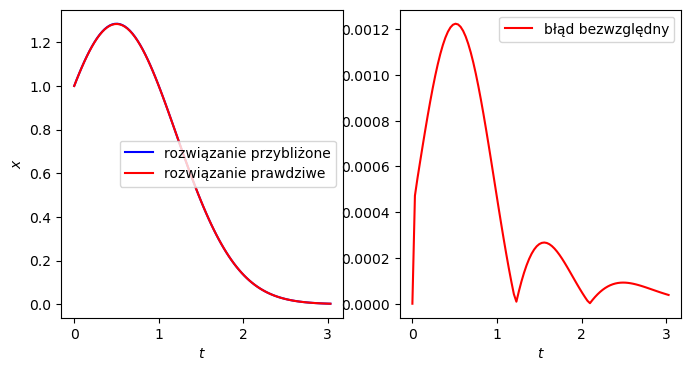

In [35]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(x.t, x.y[0], 'b', label="rozwiązanie przybliżone")
axes[0].plot(x.t, sol_true(x.t), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].legend()

axes[1].plot(x.t, np.abs(x.y[0]-sol_true(x.t)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

In [36]:
h1 = 0.03

x1 = integrate.solve_ivp(fun, tspan, [x0], method=AB2, first_step=h1)

In [37]:
h2 = 0.015

x2 = integrate.solve_ivp(fun, tspan, [x0], method=AB2, first_step=h2)

In [38]:
h3 = 0.0075

x3 = integrate.solve_ivp(fun, tspan, [x0], method=AB2, first_step=h3)

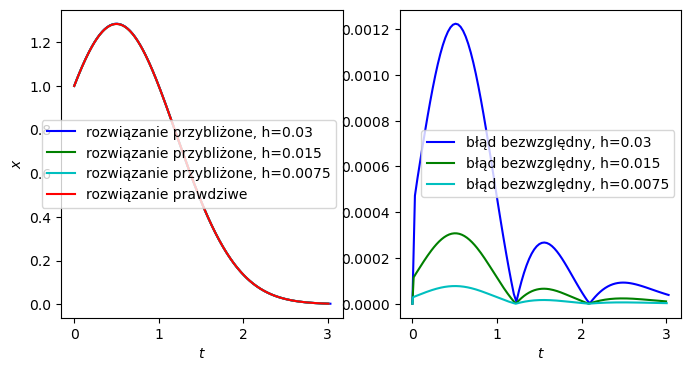

In [40]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(x1.t, x1.y[0], 'b', label="rozwiązanie przybliżone, h=0.03")
axes[0].plot(x2.t, x2.y[0], 'g', label="rozwiązanie przybliżone, h=0.015")
axes[0].plot(x3.t, x3.y[0], 'c', label="rozwiązanie przybliżone, h=0.0075")
axes[0].plot(x3.t, sol_true(x3.t), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].legend()

axes[1].plot(x1.t, np.abs(x1.y[0]-sol_true(x1.t)), 'b', label="błąd bezwzględny, h=0.03")
axes[1].plot(x2.t, np.abs(x2.y[0]-sol_true(x2.t)), 'g', label="błąd bezwzględny, h=0.015")
axes[1].plot(x3.t, np.abs(x3.y[0]-sol_true(x3.t)), 'c', label="błąd bezwzględny, h=0.0075")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

Przetestujmy jeszcze, jak metoda AB2 radzi sobie z problemem dwóch ciał.

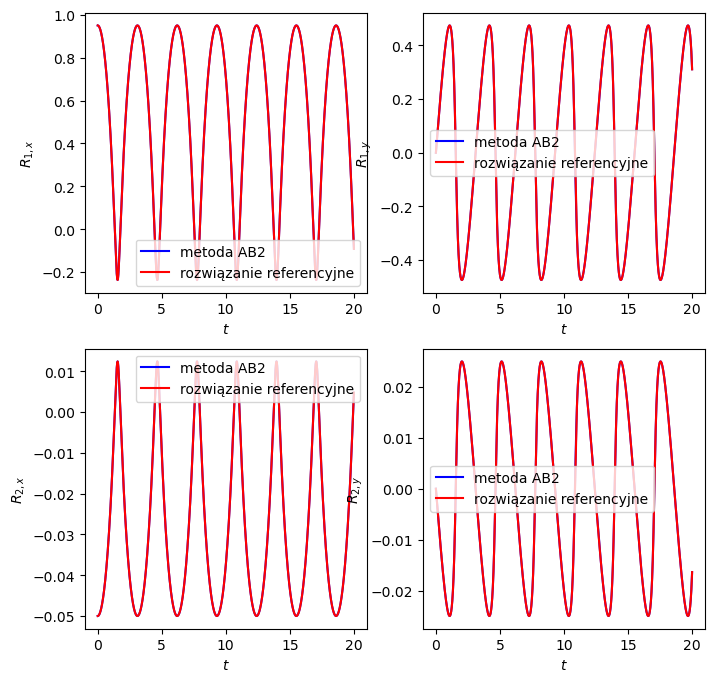

In [43]:
tspan = [0, 20]
h = 0.0001
sol_ab2 = integrate.solve_ivp(TwoBodies, tspan, R0, method=AB2, first_step=h)
sol_true = integrate.solve_ivp(TwoBodies, tspan, R0, method='DOP853', dense_output=True, rtol=1e-6, atol=1e-9)

_, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0,0].plot(sol_ab2.t, M2 * sol_ab2.y[0], 'b', label="metoda AB2")
axes[0,0].plot(sol_ab2.t, M2 * sol_true.sol(sol_ab2.t)[0], 'r', label="rozwiązanie referencyjne")
axes[0,0].set_xlabel("$t$")
axes[0,0].set_ylabel("$R_{1,x}$")
axes[0,0].legend()

axes[0,1].plot(sol_ab2.t, M2 * sol_ab2.y[1], 'b', label="metoda AB2")
axes[0,1].plot(sol_ab2.t, M2 * sol_true.sol(sol_ab2.t)[1], 'r', label="rozwiązanie referencyjne")
axes[0,1].set_xlabel("$t$")
axes[0,1].set_ylabel("$R_{1,y}$")
axes[0,1].legend()

axes[1,0].plot(sol_ab2.t, - M1 * sol_ab2.y[0], 'b', label="metoda AB2")
axes[1,0].plot(sol_ab2.t, - M1 * sol_true.sol(sol_ab2.t)[0], 'r', label="rozwiązanie referencyjne")
axes[1,0].set_xlabel("$t$")
axes[1,0].set_ylabel("$R_{2,x}$")
axes[1,0].legend()

axes[1,1].plot(sol_ab2.t, - M1 * sol_ab2.y[1], 'b', label="metoda AB2")
axes[1,1].plot(sol_ab2.t, - M1 * sol_true.sol(sol_ab2.t)[1], 'r', label="rozwiązanie referencyjne")
axes[1,1].set_xlabel("$t$")
axes[1,1].set_ylabel("$R_{2,y}$")
axes[1,1].legend()

plt.show()

**3.** Zaimplementuj poniższą metodę 2-krokową:
$$x_{n+2}-4x_{n+1}+3x_n=-2hf_n.$$
Sprawdź (korzystając z wielomianów charakterystycznych), że jest to metoda zgodna. Zastosuj ją do znalezienia przybliżonego rozwiązania problemu z poprzedniego zadania. Eksperyment przeprowadź dla parametru kroku siatki $h$ równego $0{,}3$. Do wyznaczenia wartości $x_1$ użyj metody Eulera (w tym przypadku $x_1 = 1+h$). Zilustruj niestabilność metody.

In [44]:
def method_step(fun, t0, t1, x0, x1, h):
    """
    Pojedynczy krok w dwukrokowej metodzie z zadania 3.
    
    Parametry
    ----------
    fun : obiekt wywoływalny (callable)
        Prawa strona układu równań.
    t0 : float
        Krok czasowy t_n.
    t1 : float
        Krok czasowy t_(n+1)
    x0 : ndarray, wymiaru (d,)
        Wartość przybliżenia x_n.
    x1 : ndarray, wymiaru (d,)
        Wartość przybliżenia x_(n+1)
    h : float
        Krok czasowy.
    
    Zwraca
    -------
    x_new : ndarray, wymiaru (d,)
        Rozwiązanie przybliżone w punkcie t_(n+2).
    """
    x_new = 4 * x1 - 3 * x0 - 2 * h * fun(t0, x0) 
    return x_new

In [45]:
class Method(integrate.OdeSolver):
    """
    Stałokrokowa 2-krokowa metoda jawna z zadania 3.
    
    (parametry i atrybuty jak w metodach zaimplementowanych w pakiecie `SciPy`.)
    """
    def __init__(self, fun, t0, y0, t_bound, max_step=np.inf, 
                 rtol=1e-3, atol=1e-6, vectorized=False,
                 first_step=None, **extraneous):
        integrate._ivp.common.warn_extraneous(extraneous)
        super(Method, self).__init__(fun, t0, y0, t_bound, vectorized, 
                                    support_complex=True)
        self.y_old0 = None
        self.y_old1 = None
        self.t_old0 = None
        self.t_old1 = None
        self.t0 = t0
        self.max_step = integrate._ivp.common.validate_max_step(max_step)
        self.error_estimator_order = 2
        self.rtol, self.atol = integrate._ivp.common.validate_tol(rtol, atol, self.n)
        self.f = self.fun(self.t, self.y)
        if first_step is None:
            self.h_abs = integrate._ivp.common.select_initial_step(
                self.fun, self.t, self.y, self.f, self.direction,
                self.error_estimator_order, self.rtol, self.atol)
        else:
            self.h_abs = integrate._ivp.common.validate_first_step(first_step, t0, t_bound)

    def _step_impl(self):
        t = self.t
        y = self.y
        
        if self.t_old1 is None:
            self.t_old1 = t
            self.y_old1 = y
            
            self.t = t + self.h_abs * self.direction
            self.y = euler_step(self.fun, t, y, self.h_abs * self.direction)

        else:
            self.t_old0 = self.t_old1
            self.t_old1 = t
            self.y_old0 = self.y_old1
            self.y_old1 = y
            
            self.t = t + self.h_abs * self.direction
            self.y = method_step(self.fun, self.t_old0, self.t_old1, self.y_old0, self.y_old1, self.h_abs * self.direction)

        return True, None
    
    def _dense_output_impl(self):
        return None

In [46]:
h = 0.3

tspan = [0, 3]
x0 = 1
sol_true = lambda t: np.exp(0.25 - (0.5 - t)**2)

x = integrate.solve_ivp(fun, tspan, [x0], method=Method, first_step=h)

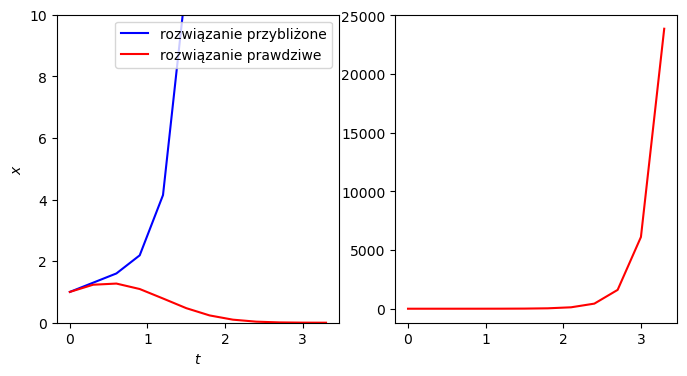

In [47]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(x.t, x.y[0], 'b', label="rozwiązanie przybliżone")
axes[0].plot(x.t, sol_true(x.t), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].set_ylim(0,10)
axes[0].legend()

axes[1].plot(x.t, np.abs(x.y[0]-sol_true(x.t)), 'r', label="błąd bezwzględny")

plt.show()

**Def. 9.** Liniowa metoda $k$-krokowa $(\star)$ jest *absolutnie stabilna* (*A-stabilna*), jeśli po zastosowaniu do problemu $x'(t) = \lambda x(t)$, gdzie $\text{Re}\lambda < 0$ i wartość $\hat{h} = h\lambda$ jest dana, jej rozwiązania zbiegają do zera, gdy $n\to\infty$ dla dowolnego wyboru wartości startowych.

**Tw. 10.** *Wielomianem stabilności* metody $(\star)$ dla danej wartości $\hat{h}$ nazywamy wielomian 
$$p(r) = \rho (r) - \hat{h}\sigma(r).$$
Metoda $(\star)$ jest absolutnie stabilna dla danego $\hat{h} = h\lambda$ wtedy i tylko wtedy, gdy wszystkie pierwiastki wielomianu stabilności leżą wewnątrz koła jednostkowego.

**Def. 11.** Zbiór wartości $\hat{h}$ na płaszczyźnie zespolonej, dla których liniowa metoda wielokrokowa $(\star)$ jest absolutnie stabilna nazywamy *obszarem absolutnej stabilności*.

**4.** Zaimplementuj metodę punktu środkowego:
$$x_{n+2} = x_n + 2hf_{n+1}$$
Zastosuj ją do znalezienia przybliżonego rozwiązania problemu
$$x'(t) = -8x(t), \; x(0)=1,$$
który ma znane rozwiązanie $x(t) = \exp(-8t)$. Eksperyment przeprowadź na przedziale $t\in(0,1)$ i dla parametru kroku siatki $h$ równego $\frac{1}{40}$ oraz $\frac{1}{120}$. Do wyznaczenia wartości $x_1$ użyj znanego rozwiązania, tzn. $x(t_1)$. Zilustruj brak absolutnej stabilności metody.

In [49]:
def midpoint_step(fun, t0, t1, x0, x1, h):
    """
    Pojedynczy krok w metodzie punktu środkowego.
    
    Parametry
    ----------
    fun : obiekt wywoływalny (callable)
        Prawa strona układu równań.
    t0 : float
        Krok czasowy t_n.
    t1 : float
        Krok czasowy t_(n+1)
    x0 : ndarray, wymiaru (d,)
        Wartość przybliżenia x_n.
    x1 : ndarray, wymiaru (d,)
        Wartość przybliżenia x_(n+1)
    h : float
        Krok czasowy.
    
    Zwraca
    -------
    x_new : ndarray, wymiaru (d,)
        Rozwiązanie przybliżone w punkcie t_(n+2).
    """
    x_new = x0 + 2 * h * fun(t1, x1) 
    return x_new

In [50]:
class Midpoint(integrate.OdeSolver):
    """
    Stałokrokowa 2-krokowa metoda jawna z zadania 3.
    
    (parametry i atrybuty jak w metodach zaimplementowanych w pakiecie `SciPy`.)
    """
    def __init__(self, fun, t0, y0, t_bound, max_step=np.inf, 
                 rtol=1e-3, atol=1e-6, vectorized=False,
                 first_step=None, **extraneous):
        integrate._ivp.common.warn_extraneous(extraneous)
        super(Midpoint, self).__init__(fun, t0, y0, t_bound, vectorized, 
                                    support_complex=True)
        self.y_old0 = None
        self.y_old1 = None
        self.t_old0 = None
        self.t_old1 = None
        self.t0 = t0
        self.max_step = integrate._ivp.common.validate_max_step(max_step)
        self.error_estimator_order = 2
        self.rtol, self.atol = integrate._ivp.common.validate_tol(rtol, atol, self.n)
        self.f = self.fun(self.t, self.y)
        if first_step is None:
            self.h_abs = integrate._ivp.common.select_initial_step(
                self.fun, self.t, self.y, self.f, self.direction,
                self.error_estimator_order, self.rtol, self.atol)
        else:
            self.h_abs = integrate._ivp.common.validate_first_step(first_step, t0, t_bound)

    def _step_impl(self):
        t = self.t
        y = self.y
        
        if self.t_old1 is None:
            self.t_old1 = t
            self.y_old1 = y
            
            self.t = t + self.h_abs * self.direction
            self.y = euler_step(self.fun, t, y, self.h_abs * self.direction)

        else:
            self.t_old0 = self.t_old1
            self.t_old1 = t
            self.y_old0 = self.y_old1
            self.y_old1 = y
            
            self.t = t + self.h_abs * self.direction
            self.y = midpoint_step(self.fun, self.t_old0, self.t_old1, self.y_old0, self.y_old1, self.h_abs * self.direction)

        return True, None
    
    def _dense_output_impl(self):
        return None

In [51]:
def fun(t, x):
    "Prawa strona równania x' = - 8*x."
    dx = - 8 * x 
    return dx

tspan = [0, 1]
x0 = 1
sol_true = lambda t: np.exp(- 8 * t)

In [62]:
h = 1/240

x = integrate.solve_ivp(fun, tspan, [x0], method=Midpoint, first_step=h)

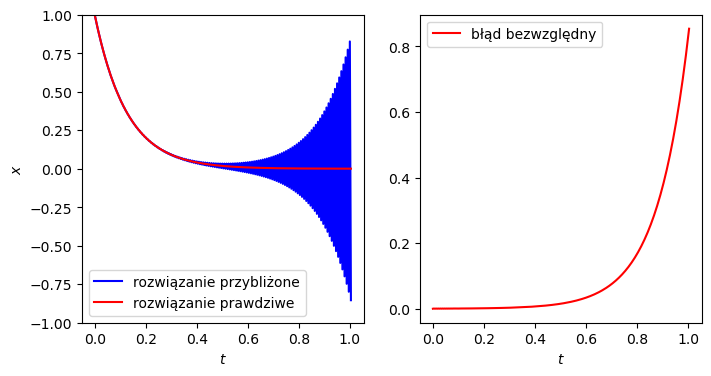

In [63]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(x.t, x.y[0], 'b', label="rozwiązanie przybliżone")
axes[0].plot(x.t, sol_true(x.t), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].set_ylim(-1, 1)
axes[0].legend()

axes[1].plot(x.t, np.abs(x.y[0]-sol_true(x.t)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

**5.** Zastosuj metodę Eulera oraz 2-krokową metodę Adamsa-Bashfortha do znalezienia przybliżonego rozwiązania problemu
z poprzedniego zadania. Eksperyment przeprowadź na przedziale $t\in(0,5)$ i dla parametru kroku siatki $h$:
* w 2-krokowej metodzie Adamsa-Bashfortha równego $\frac{1}{4}$ oraz $\frac{1}{20}$ (do wyznaczenia wartości $x_1$ użyj znanego rozwiązania, tzn. $x(t_1)$);
* w metodzie Eulera równego $\frac{1}{2}$ oraz $\frac{1}{5}$.

Dla których parametrów $h$ metoda jest absolutnie stabilna?

In [87]:
tspan = [0 ,5]
h = 1/7.9

x = integrate.solve_ivp(fun, tspan, [x0], method=AB2, first_step=h)

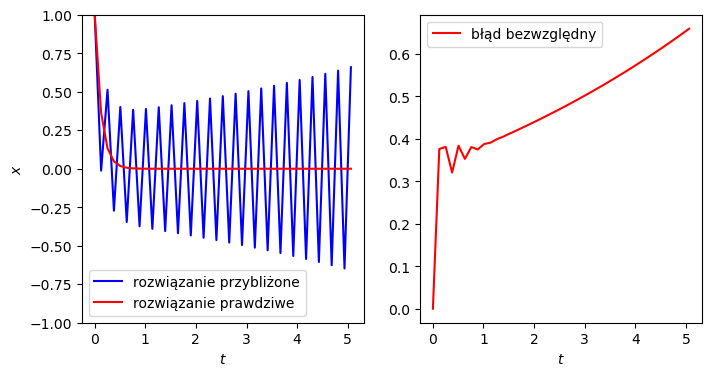

In [88]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(x.t, x.y[0], 'b', label="rozwiązanie przybliżone")
axes[0].plot(x.t, sol_true(x.t), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].set_ylim(-1, 1)
axes[0].legend()

axes[1].plot(x.t, np.abs(x.y[0]-sol_true(x.t)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

In [99]:
h = 0.01

x = integrate.solve_ivp(fun, tspan, [x0], method=Euler, first_step=h)

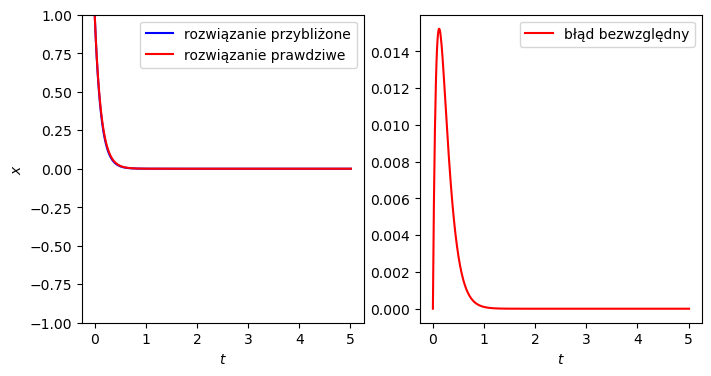

In [100]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(x.t, x.y[0], 'b', label="rozwiązanie przybliżone")
axes[0].plot(x.t, sol_true(x.t), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].set_ylim(-1, 1)
axes[0].legend()

axes[1].plot(x.t, np.abs(x.y[0]-sol_true(x.t)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

**Tw. 12** (druga bariera Dahlquista)**.**
* Nie istnieje jawna liniowa metoda wielokrokowa, które jest bezwarunkowo absolutnie stabilna.
* Niejawna liniowa metoda wielokrokowa, która jest absolutnie stabilna ma rząd dokładności nie większy niż 2.

## PRACA DOMOWA

Pracę domową (**pojedynczy plik** notatnika z rozszerzeniem .ipynb) należy przesłać za pośrednictwem platformy *MS Teams* (moduł Zadania) do czwartku **20 listopada 2025 roku do godziny 9:00**. Przesłanie rozwiązania po terminie skutkuje otrzymaniem 0 punktów za tę pracę domową.

**D1** (*2 punkty*). Zaimplementuj poniższą metodę 2-krokową:
$$x_{n+2} - \frac{2}{3}x_{n+1} - \frac{1}{3}x_n = \frac{h}{3}\big(5f_{n+1} - f_n\big).$$
Zastosuj ją do znalezienia przybliżonego rozwiązania problemu
$$x'(t) = (1-2t)x(t), \; x(0)=1.$$
Eksperyment przeprowadź na przedziale $t\in(0,3)$ i dla parametru kroku siatki $h$ równego $0{,}3$, $0{,}15$ oraz $0{,}075$. Do wyznaczenia wartości $x_1$ użyj metody Eulera (w tym przypadku $x_1 = 1+h$). 
1. Porównaj na wykresie otrzymane przybliżenia z prawdziwym rozwiązaniem.
2. Za pomocą odpowiednich wykresów błędu globalnego oszacuj rząd dokładności tej metody.

**D2** (*2 punkty*). Zaimplementuj poniższą metodę 2-krokową:
$$x_{n+2}-x_{n+1}=hf_n.$$
Zastosuj ją do znalezienia przybliżonego rozwiązania problemu
$$x'(t) = -8x(t), \; x(0)=1.$$
Eksperyment przeprowadź na przedziale $t\in(0,5)$ i dla parametru kroku siatki $h$ równego $\frac{1}{7}$ oraz $\frac{1}{14}$. Do wyznaczenia wartości $x_1$ użyj znanego rozwiązania, tzn. $x(t_1)$. 
1. Porównaj na wykresie otrzymane przybliżenia z prawdziwym rozwiązaniem. 
2. Dla których parametrów $h$ metoda jest absolutnie stabilna? Uzasadnij odpowiedź wykonując odpowiednie obliczenia.
3. Czy uzyskane wyniki pozwalają na stwierdzenie, że metoda jest rozbieżna? Czy rzeczywiście jest to metoda rozbieżna?

*W punkcie 2. i 3. obliczenia uzasadniające stwierdzenia należy przeprowadzić teoretycznie. Rachunki można zapisać w markdownie - markdown obsługuje $\LaTeX$a.*